In [93]:
# Under this comment the modules are necessary for this if not present in system please install it using the pip commands.
import pandas_datareader as web
import datetime
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [94]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2024,1,1)

df = yf.download("AAPL",start, end)
df.head()

C:\Users\Jishu Debnath\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435272,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746893,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749128,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082142,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000


In [95]:
# To see the tail end of apple stock
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [96]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435272,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746893,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749128,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082142,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000


In [97]:
# We dropped the "Date" and "Adj Close" column in the head of the stocks datasheet.
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


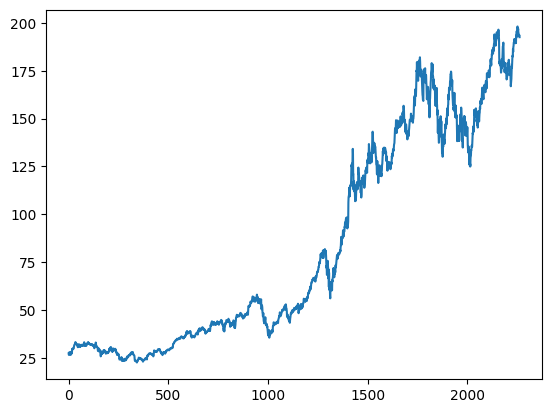

In [98]:
# Plotted the apple stock graph.
plt.plot(df.Close)

In [99]:
# Defining 100-Day Moving Average
#  It represents the average price of a stock over a period of 100 days or medium term. Like any other moving average, the 100-day moving average also helps traders analyse price trends.
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2259,195.179993,195.410004,192.970001,193.600006,37122800
2260,193.610001,193.889999,192.830002,193.050003,28919300
2261,192.490005,193.500000,191.089996,193.149994,48087700
2262,194.139999,194.660004,193.169998,193.580002,34049900


In [100]:
# Calculating the apple stock 100 day avg.
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    181.768301
2260    181.787101
2261    181.898701
2262    182.046001
2263    182.173301
Name: Close, Length: 2264, dtype: float64

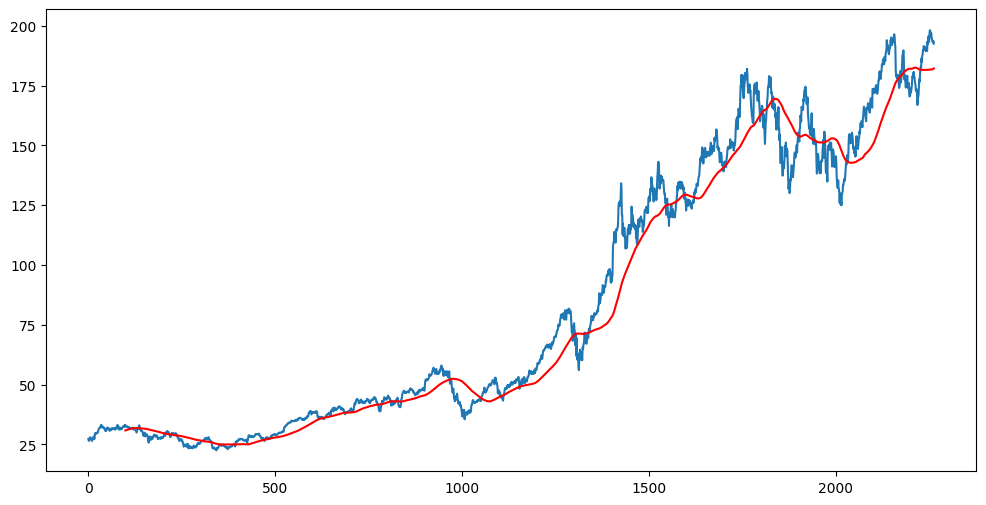

In [102]:
# Now plotting the graph for 100 days moving average.
plt.figure(figsize = (12,6))
# Now we plot the stock graph.
plt.plot(df.Close)
# On top of the stock graph we plot the 100 day avg graph with red color.
plt.plot(ma100,'r')

In [103]:
# Now we do the same for 200 day avg.
ma200 = df.Close.rolling(200).mean()
ma200


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    178.649100
2260    178.871851
2261    179.085250
2262    179.290201
2263    179.487900
Name: Close, Length: 2264, dtype: float64

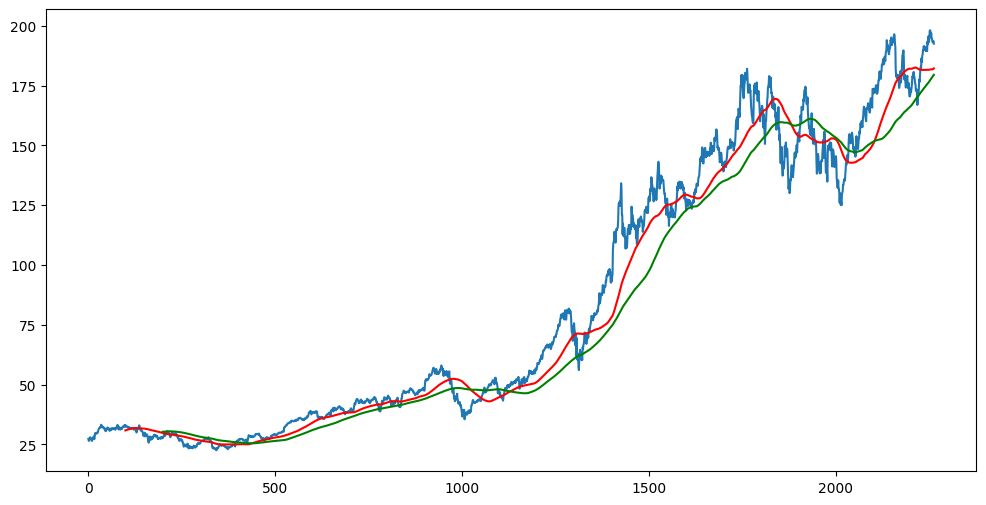

In [104]:
# Now we plot both 100 and 200 day avg on the graph.
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')



In [105]:
df.shape
# We run the above code snippet to see the max no of rows and columns.

(2264, 5)

In [107]:
# Splitting the "close" column Data into Training and Testing.
# For Data Training, DataFrame for close column and staring from the 0 index we calculate 70% of the total values.

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) # Starting from the 0th index of "close" column

# For Data Testing and it will start from the 70% value and it will be going till the complete length.
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

# Here the data is splitted in to such a way that 70% data is used for training and 30% data is used for testing.

print(data_training.shape)
print(data_testing.shape)
 

(1584, 1)
(680, 1)


In [108]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [109]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [110]:
# Now we scale down the data between 0 and 1 using sklearn.preprocessing.
# Also install scikit-learn using the pip installer.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))


In [111]:
# Now fitting the Training data first.

data_training_array = scaler.fit_transform(data_training) # Scaled down the data using MinMaxScaler.
data_training_array

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.92817746],
       [0.92535766],
       [0.93099725]])

In [112]:
data_training_array.shape # Here 880 rows of data are subjected for training and the rest of the row is used for testing part

(1584, 1)

In [113]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
  x_train.append(data_training_array[i - 100: i])
  y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [114]:
x_train.shape

(1484, 100, 1)

In [115]:
# Now we are creating ML model.

In [116]:
# Now by using keras pylib we imported Dense, Dropout, LSTM from keras.layers.
# Also imported Sequential from keras.model.

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [119]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [120]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50) # Here we are using time series analysis. So, we have and for that we are keeping the loss as 'mean_squared_error'

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 0.0547
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0087
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0057
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0046
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0039
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0038
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0032
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0038
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0038
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0032
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0033
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0032
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0038
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0038
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - l

In [123]:
model.save('keras_model_stock.keras')

In [124]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [125]:
data_training.tail(100)

,Close
1484,113.849998
1485,115.169998
1486,116.029999
1487,116.589996
1488,119.050003
...,...
1579,134.429993
1580,132.029999
1581,134.500000
1582,134.160004


In [126]:
# Appednding the data trained 100 values to the data testing. 
past_100_days = data_training.tail(100)

In [127]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [128]:
final_df.head()

,Close
0,113.849998
1,115.169998
2,116.029999
3,116.589996
4,119.050003


In [129]:
# Now applying the MinMaxScaler to scale the data.

input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01566579],
       [0.0258723 ],
       [0.03251837],
       [0.0617138 ],
       [0.10526943],
       [0.10954193],
       [0.10788041],
       [0.09969145],
       [0.11749349],
       [0.12497031],
       [0.09411346],
       [0.11144077],
       [0.10159037],
       [0.09411346],
       [0.16650841],
       [0.16567765],
       [0.17624019],
       [0.15202949],
       [0.1706622 ],
       [0.21398061],
       [0.20306204],
       [0.21504869],
       [0.27106579],
       [0.24946589],
       [0.23581773],
       [0.22359368],
       [0.18466657],
       [0.2036553 ],
       [0.15131735],
       [0.20258722],
       [0.21599815],
       [0.17956322],
       [0.17742706],
       [0.20223119],
       [0.17873255],
       [0.15772609],
       [0.16591506],
       [0.21576074],
       [0.27320195],
       [0.29931175],
       [0.34500355],
       [0.34785194],
       [0.33479704],
       [0.27581293],
       [0.21493007],
       [0.24080228],
       [0.250

In [130]:
input_data.shape

(780, 1)

In [131]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
  x_test.append(input_data[i - 100: i])
  y_test.append(input_data[i , 0])
  

In [132]:
# Converting the x_test and y_test into numpy arrays.
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [134]:
# Now for makking predictions.

y_predicted = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [135]:
y_predicted.shape

(680, 1)

In [136]:
y_test

array([0.22857823, 0.23320675, 0.21469266, 0.24293862, 0.24768576,
       0.24376929, 0.23415622, 0.23296934, 0.20899606, 0.22181337,
       0.16615238, 0.16911948, 0.18858304, 0.19416102, 0.15428435,
       0.14312847, 0.10586278, 0.1319725 , 0.16140515, 0.14740088,
       0.1305483 , 0.12864946, 0.15974364, 0.13743178, 0.15725136,
       0.15487779, 0.15428435, 0.13565155, 0.1277    , 0.12378353,
       0.13304057, 0.11500121, 0.14289106, 0.14300976, 0.15297886,
       0.15760739, 0.14550204, 0.16021837, 0.19736526, 0.18739616,
       0.19344879, 0.21291235, 0.19712803, 0.21896516, 0.23890336,
       0.23558032, 0.23213867, 0.22857823, 0.24839781, 0.26679329,
       0.27427021, 0.27794927, 0.30987429, 0.3343224 , 0.3645859 ,
       0.3488014 , 0.37099456, 0.36375505, 0.3772846 , 0.41894131,
       0.41098975, 0.38618562, 0.33942556, 0.38333723, 0.3744362 ,
       0.39105155, 0.41193921, 0.41704256, 0.39069553, 0.36945166,
       0.3772846 , 0.37989558, 0.37586049, 0.39769762, 0.39283

In [137]:
y_predicted

array([[0.14344214],
       [0.14959094],
       [0.15694672],
       [0.1654881 ],
       [0.17464283],
       [0.18389632],
       [0.19279513],
       [0.20096251],
       [0.20810667],
       [0.214048  ],
       [0.21876185],
       [0.22173142],
       [0.2221351 ],
       [0.2197535 ],
       [0.21540064],
       [0.20964828],
       [0.20305257],
       [0.19634502],
       [0.19017145],
       [0.18485889],
       [0.18033443],
       [0.17635143],
       [0.17273489],
       [0.16939399],
       [0.16631246],
       [0.1635716 ],
       [0.1612193 ],
       [0.15929523],
       [0.15776148],
       [0.15652966],
       [0.15550157],
       [0.15460716],
       [0.15375948],
       [0.15293594],
       [0.15214863],
       [0.1514464 ],
       [0.15090358],
       [0.15055771],
       [0.15044217],
       [0.15065546],
       [0.1512757 ],
       [0.15232994],
       [0.15386078],
       [0.15588012],
       [0.15852274],
       [0.16195612],
       [0.1664441 ],
       [0.171

In [138]:
# Now scaling the values up again.
scaler.scale_

array([0.01186803])

In [139]:
scale_factor = 1/0.01186803
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

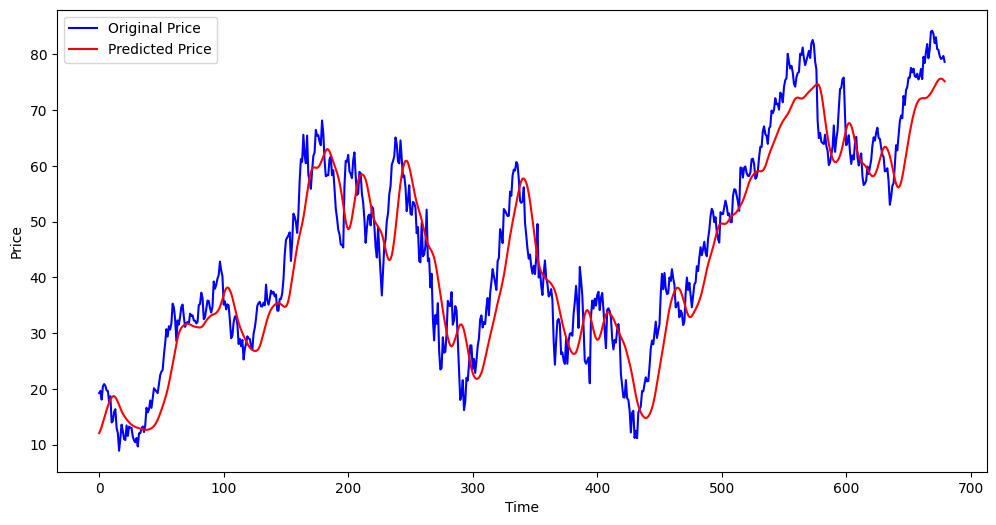

In [140]:
# Now plotting the graph for predicted values.
# The pridected graph will not be 100% accurate but will give approximate predicted trends for the stock.
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

